# <HR> Homework: Spectral clustering <HR>


<span style="color: red; font-size: 14pt">Deadline: none</span>

**Requirements**: 

- The report shoulbe in a file: ``MLDM2020-HSE-HW1-Spectral_<your_full_name>.ipynb``;
- It should be sent dmitrii.ignatov@gmail.com and egurnovdima@gmail.com with the topic [MLDM2020-HSE-HW-Spectral]-<your_full_name>.



### Import Required Packages

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.sparse.linalg import eigsh
from matplotlib import colors as c
from sklearn.cluster import SpectralClustering

In [2]:
DATA_PATH = 'data/'

In [3]:
def load_data(file_name1, file_name2):
    data = np.genfromtxt(DATA_PATH+file_name1).astype(int)
    with open(DATA_PATH + file_name2, 'r') as iofile:
        labels = np.array(iofile.readlines())
    return data, labels

In [4]:
def convert_to_adjacency_matrix(data, n, m, n_connections):
    """It has 2000 companies, 3000 advertising terms, 
    92345 connections in the graph showing that a firm buys a term
    """
    #adjacency matrix n x m
    A_small = np.zeros((n, m))
    A_small[data[:,0], data[:,1]] = 1
    A = np.vstack((
            np.hstack((np.zeros((n, n)), A_small)),
            np.hstack((A_small.T, np.zeros((m, m))))
        ))
    assert sum(sum(A_small)) == n_connections
    return A

In [5]:
data, labels = load_data('us.3k.2k.smat', 'us.3k.2k.trms')
n, m, n_connections = data[0]

## 1. Spectral clustering using Laplacian matrix approach

#### Create the adjacency matrix for the graph using bipartite data

In [6]:
A = convert_to_adjacency_matrix(data[1:], n, m, n_connections)

In [7]:
A.shape

(5000, 5000)

#### Visualize the adjacency matrix, A

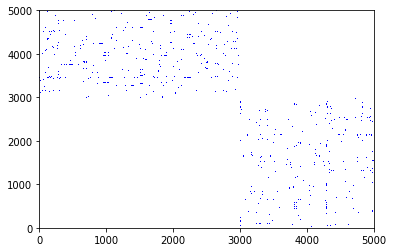

In [8]:
plt.pcolormesh(A, cmap=c.ListedColormap(['w','b']))

#### Create the Laplacian matrix, L=D-A

In [9]:
D = np.diag(sum(A))
L = D - A

#### Compute the Eigenvalues and Eigenvectors for Laplacian matrix

In [10]:
eigenvalues, eigenvectors = eigsh(L, which='SA')

In [11]:
#smallest and largest eigenvalues
eigenvalues[0], eigenvalues[-1]

(2.8959127979927936e-14, 1.8318113607058868)

In [12]:
#Second smalled eigenvalue
eigenvalues[1]

0.6031375175232628

Note: - eigen value is quite small that's mean we will find fairly small number of clusters or tighter clusters

In [13]:
#eigen vector corresponding to the second smallest eigen value
vec2 = eigenvectors[:,1]

#### Plot the second smallest eigenvector

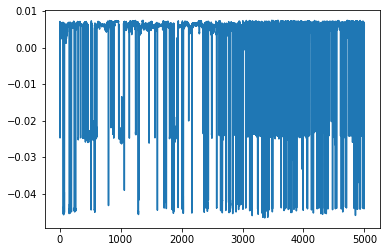

In [14]:
plt.plot(vec2)

#### Plot the sorted second smallest eigenvector

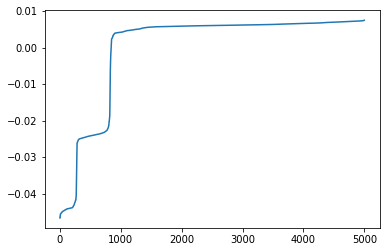

In [15]:
Ids = np.argsort(vec2)
plt.plot(vec2[Ids])

Note: - Now, above plot is informative because we can see gap between the set of components of second smallest eigenvector. There is two large gaps in them that's mean we are expected to have three large cluster in our dataset.

#### Sort adjacency matrix, A by second vector components

In [16]:
B = A[Ids, :] #Sort the adjacency matrix to the new order of the second vector components; first, by rows
B = B[:,Ids] #by columns;

#### Visualize the sorted adjacency matrix, B

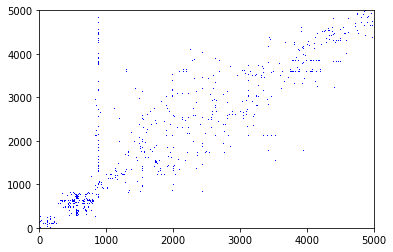

In [17]:
plt.pcolormesh(B, cmap=c.ListedColormap(['w','b']))

Note: - As we can seee three large clusters/groups in the above color mesh as expected. 

#### Validate Using 3000 advertising terms

In [18]:
result = ''.join(labels[Ids[Ids <= 3000][2500:2521]])
print(result)

lodging new york
cancun hotel mexico
hotel little rock
albany hotel
discount vacation
credit online report
beach city hotel panama
hotel sarasota
columbus hotel ohio
laser printer
hotel petersburg st
hotel madison
hotel sedona
account ecommerce merchant
ca diego hotel san
home refinancing
atlanta ga hotel
cleveland hotel ohio
hotel omaha
caribbean vacation
hotel puerto vallarta



## 2. Spectral clustering Using Scikit-Learn

In [19]:
model = SpectralClustering(affinity = 'precomputed', 
                           assign_labels="discretize", 
                           random_state=10, n_clusters=3).fit(A)

Text(0.5, 0, 'Cluster')

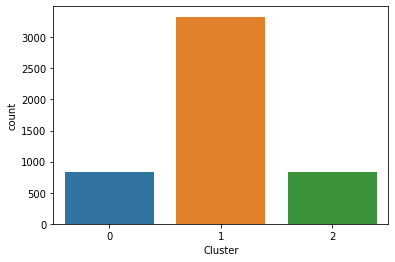

In [20]:
#Clusters size
ax = sns.countplot(model.labels_)
ax.set_xlabel('Cluster')